01:00:25 Warning: both f and g are None. Are you sure this is what you want?
01:00:25 f is None. Setting f=1
01:00:25 g is None. Setting Dirichlet BCs 
01:00:27 Integral: 0.03500889856987614


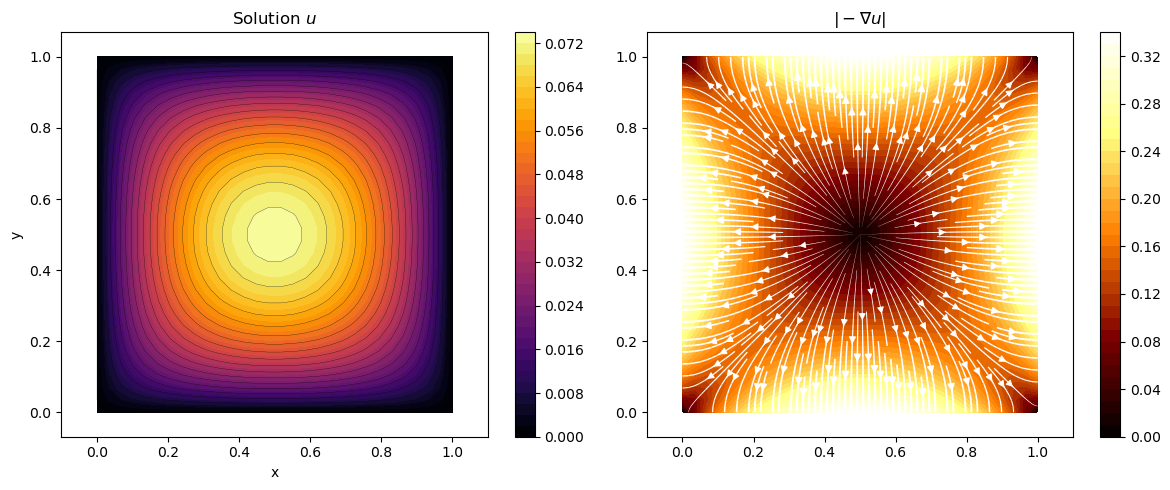

In [1]:
from poisson_2D_transform import solve_and_plot
solve_and_plot(Nx=30, Ny=30)

00:58:01 g is None. Setting Dirichlet BCs 
00:58:03 Integral: 0.06935111999589513


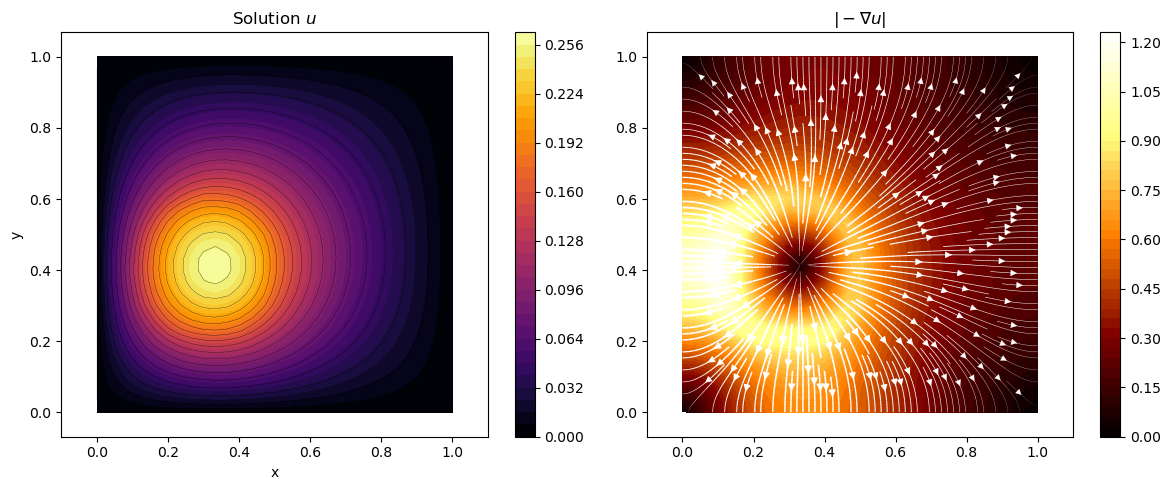

In [10]:
from poisson_2D_transform import solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if (x - 0.3)**2 + (y - 0.4)**2 < 0.2**2 :
        return 10
    return 0

solve_and_plot(Nx=31, Ny=31, f=f)

00:58:00 Integral: 0.08323550385934068


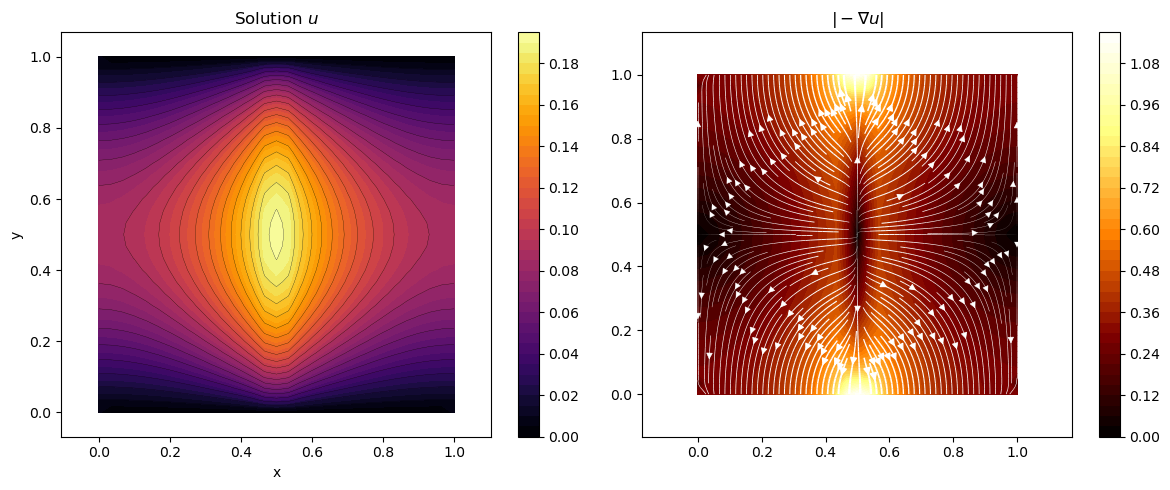

In [9]:
from poisson_2D_transform import solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if 0.45 < x < 0.55:
        return 10
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

solve_and_plot(Nx=31, Ny=31, f=f, g=g)

14:02:21 Integral: 5.291646322883412


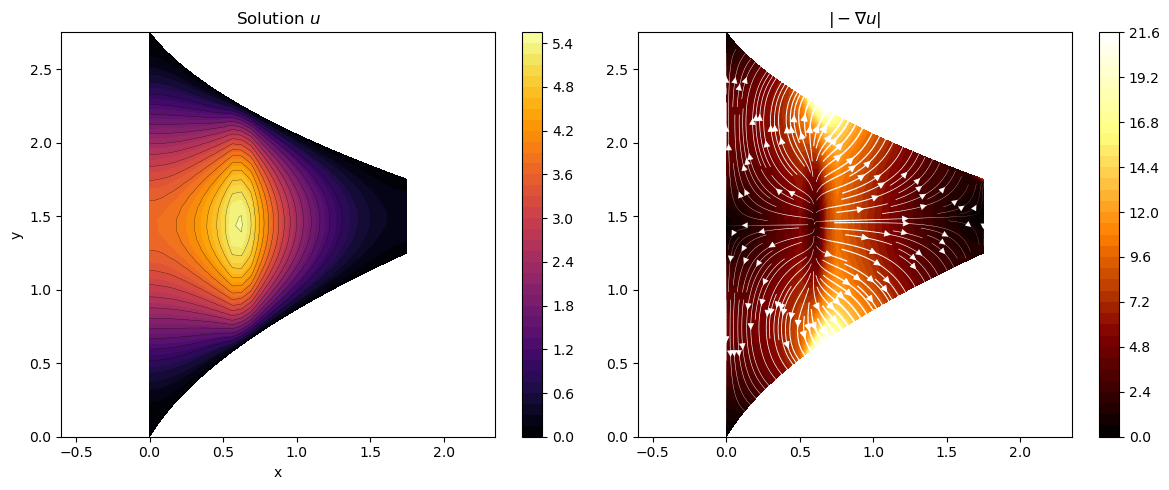

In [30]:
from poisson_2D_transform import Transformation, solve_and_plot, plotGeometry
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if 0.45 < ksi < 0.55:
        return 100
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi**2 + 0.75*ksi
Ty = (1-eta)*(1.25*ksi) + eta*(2.75-ksi)
transformation = Transformation(ksi, eta, Tx, Ty)
# plotGeometry(29, 29, transformation)
solve_and_plot(Nx=29, Ny=29, transformation=transformation, f=f, g=g)

00:57:49 Warning: both f and g are None. Are you sure this is what you want?
00:57:49 f is None. Setting f=1
00:57:49 g is None. Setting Dirichlet BCs 
00:57:52 Integral: 0.016063603756651165


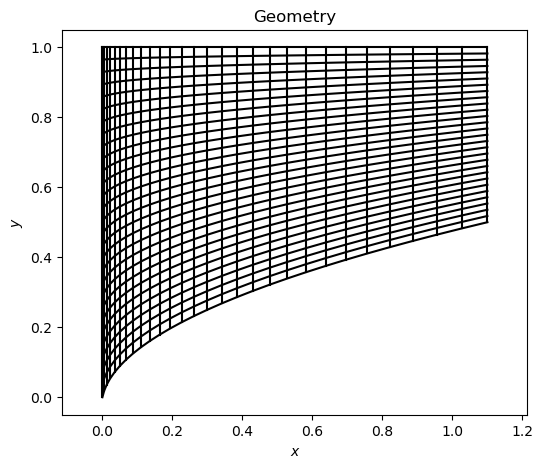

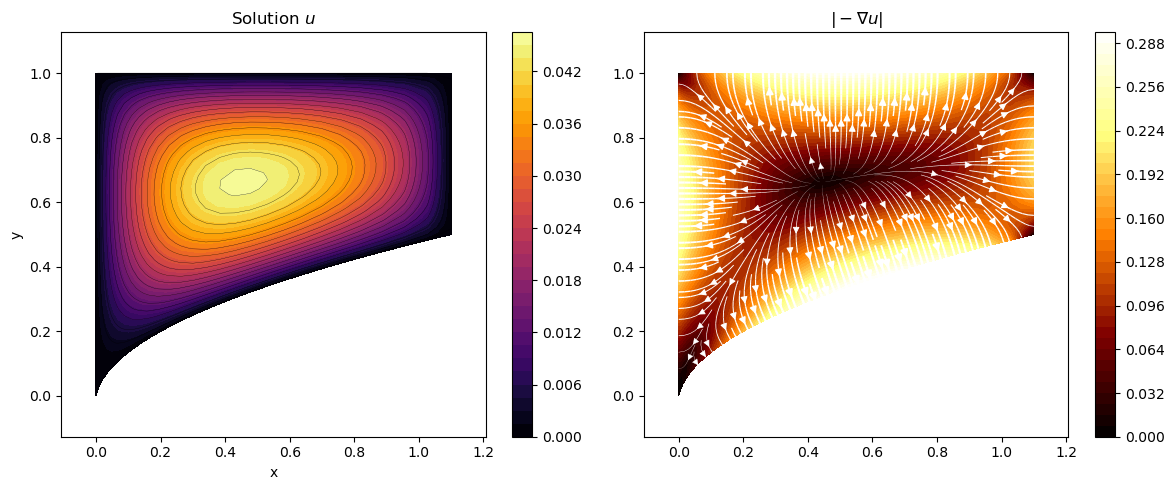

In [7]:
from poisson_2D_transform import Transformation, plotGeometry, solve_and_plot

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi**2 + 0.1*ksi
Ty = 1/2*ksi*(1-eta) + eta
transformation = Transformation(ksi, eta, Tx, Ty)
plotGeometry(Nx=29, Ny=29, transformation=transformation)
solve_and_plot(Nx=29, Ny=29, transformation=transformation)

14:04:50 Integral: 0.021996048708012562


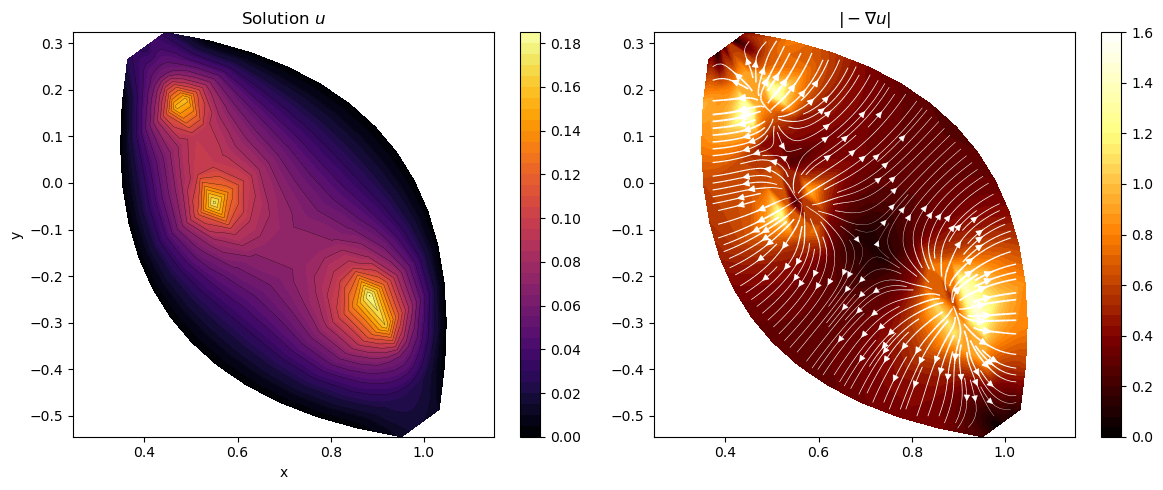

In [33]:
import numpy as np
from poisson_2D_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    if (0.7 < ksi < 0.8 and 0.6 < eta < 0.7) or (0.3 < ksi < 0.4 and 0.3 < eta < 0.4) or (0.1 < ksi < 0.2 and 0.4 < eta < 0.55):
        return 100
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = ksi
ellipse_bottom = (ksi-0.5)**2 + 0.2
ellipse_top = 1 - ellipse_bottom
Ty = ellipse_bottom*(1-eta) + ellipse_top*eta
rotate_phi = -1.2*np.pi/4
Tx_rot, Ty_rot = np.cos(rotate_phi)*Tx - np.sin(rotate_phi)*Ty, np.sin(rotate_phi)*Tx + np.cos(rotate_phi)*Ty
solve_and_plot(Nx=15, Ny=15, transformation=Transformation(ksi, eta, Tx_rot, Ty_rot), f=f, g=g, contour_levels=20)

14:06:35 Integral: 0.46734117404100817


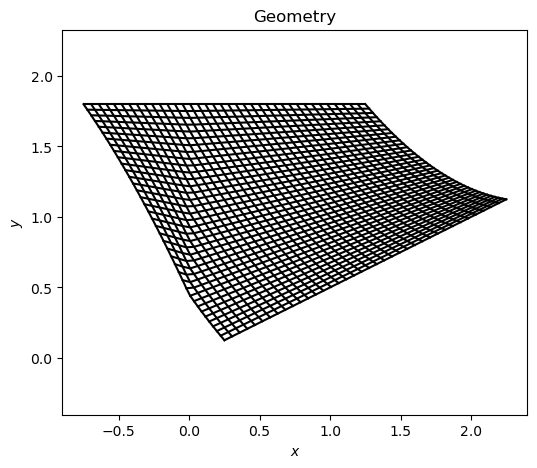

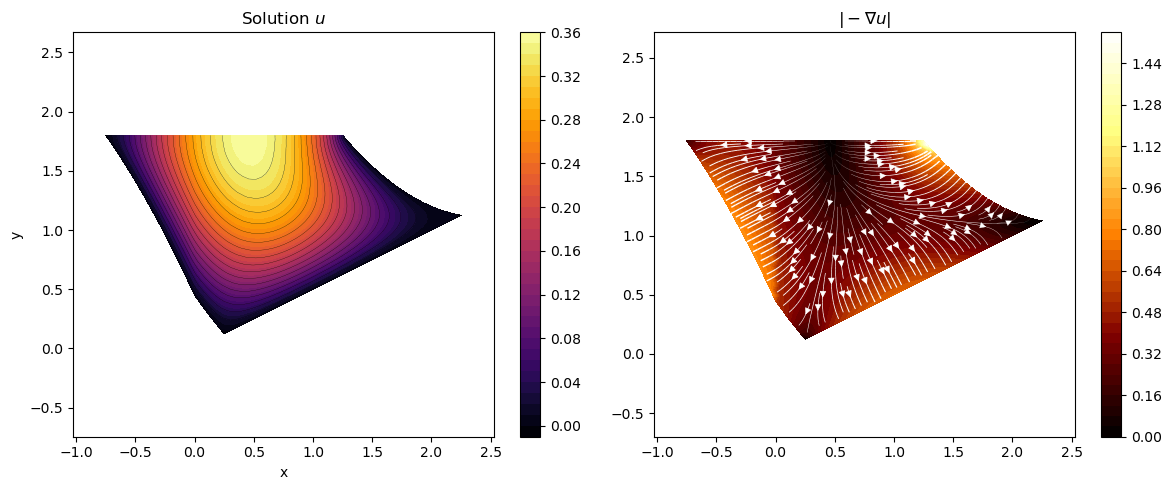

In [39]:
import sympy
from poisson_2D_transform import Transformation, solve_and_plot, plotGeometry
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 1
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)
    if ksi == 0:  # left, dirichlet = 0
        return (1, 0, 0)
    if ksi == 1:  # right, dirichlet = 0
        return (1, 0, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)

ksi, eta = Transformation.get_ksi_eta()
Tx = (2*ksi+0.25-eta)
bottom_curve = 0.5*sympy.Abs(Tx+1e-6)  # add 1e-6 to avoid derivative at kink
Ty = bottom_curve + (1.8 - bottom_curve)*eta
plotGeometry(38, 38, Transformation(ksi, eta, Tx, Ty))
solve_and_plot(Nx=38, Ny=38, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

14:06:52 Integral: -29.042871607935247


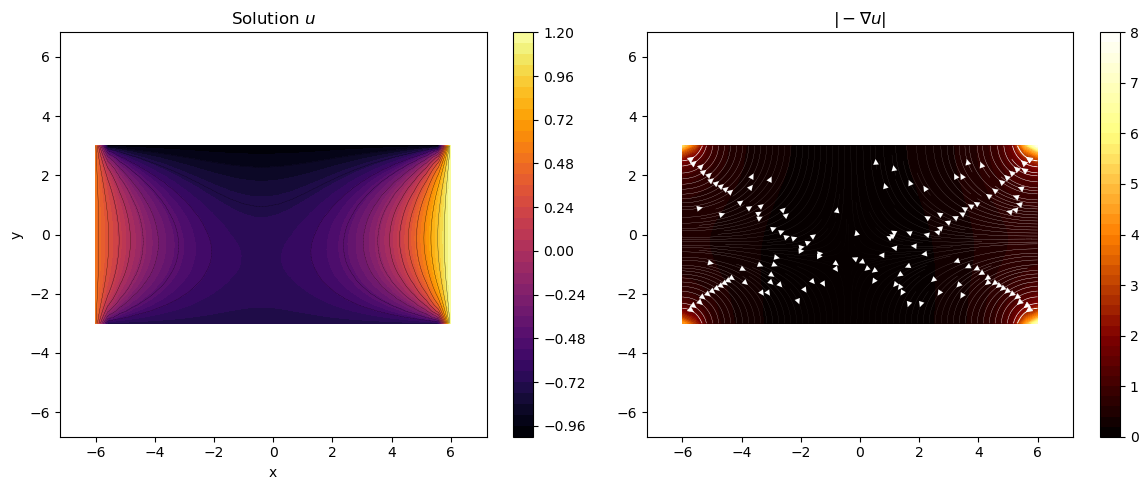

In [40]:
from poisson_2D_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, dirichlet = 0.5
        return (1, 0, 0.5)
    if ksi == 1:  # right, dirichlet = 1.2
        return (1, 0, 1.2)
    if eta == 0:  # bottom, dirichlet = -0.75
        return (1, 0, -0.75)
    if eta == 1:  # top, dirichlet = -1
        return (1, 0, -1)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=30, Ny=30, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

14:06:58 Integral: -11.898317261702779


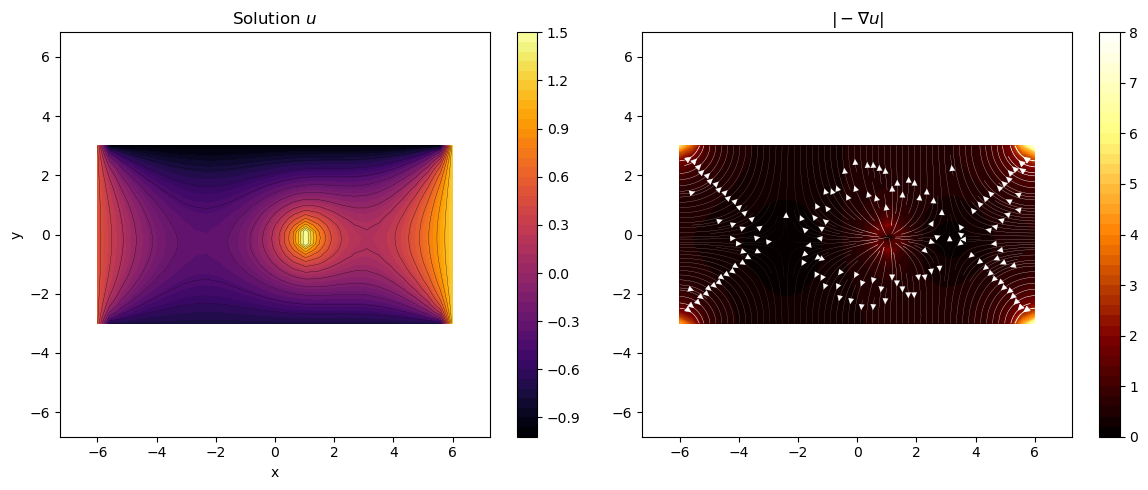

In [41]:
from poisson_2D_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, dirichlet = 0.5
        return (1, 0, 0.5)
    if ksi == 1:  # right, dirichlet = 1.2
        return (1, 0, 1.2)
    if eta == 0:  # bottom, dirichlet = -0.75
        return (1, 0, -0.75)
    if eta == 1:  # top, dirichlet = -1
        return (1, 0, -1)

    # dirichlet conditions inside the domain
    if 1 < x < 1.4 and -0.5 < y < 0.2:
        return (1, 0, 1.5)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=30, Ny=30, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

14:07:42 Integral: 35.22407755631799


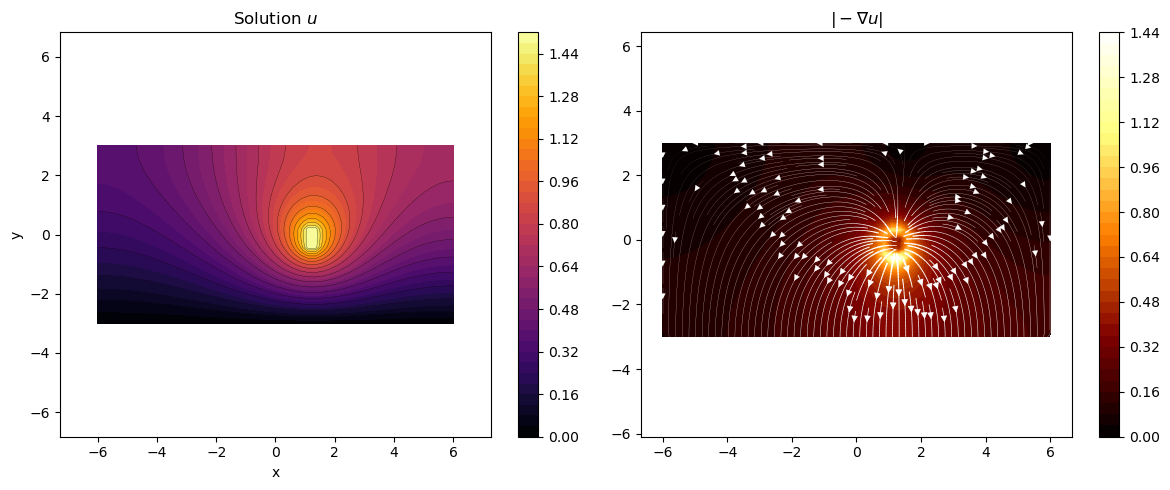

In [42]:
from poisson_2D_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, dirichlet = 0
        return (1, 0, 0)
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)

    # dirichlet conditions inside the domain
    if 1 < x < 1.4 and -0.5 < y < 0.2:
        return (1, 0, 1.5)

ksi, eta = Transformation.get_ksi_eta()
Tx = 12*ksi - 6
Ty = 6*eta - 3
solve_and_plot(Nx=50, Ny=50, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)

14:08:02 Integral: 64.89227055928428


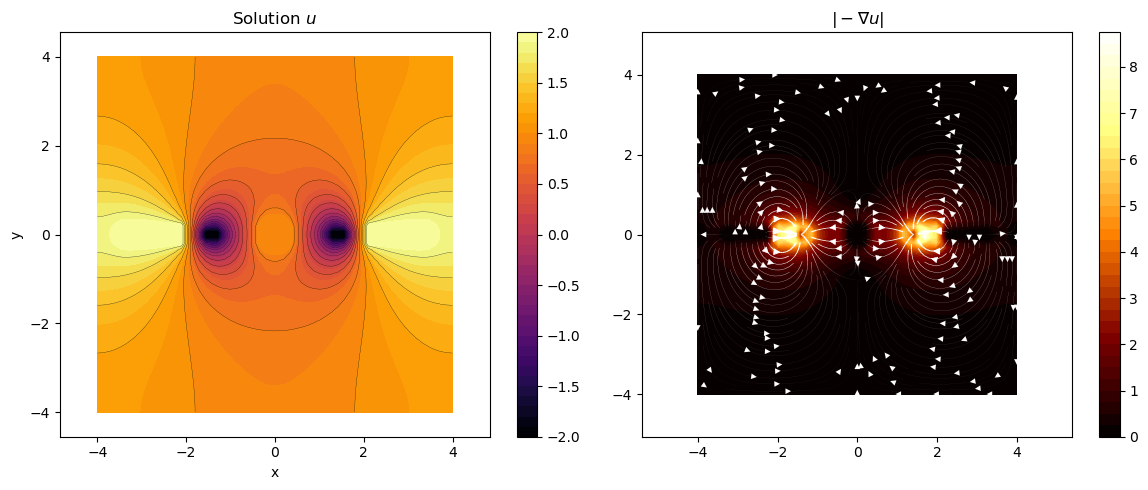

In [43]:
from poisson_2D_transform import Transformation, solve_and_plot
def f(x, y, ksi, eta):
    """Returns f for the equation -∇2 u = f in Ω"""
    return 0
def g(x, y, ksi, eta):
    """Returns (a, b, g) for the boundary condition a*u + b*∂u/∂n = g on ∂Ω and (1, 0, g) for dirichlet conditions inside the domain)"""
    if ksi == 0:  # left, neumann = 0
        return (0, 1, 0)
    if ksi == 1:  # right, neumann = 0
        return (0, 1, 0)
    if eta == 0:  # bottom, neumann = 0
        return (0, 1, 0)
    if eta == 1:  # top, neumann = 0
        return (0, 1, 0)

    # dirichlet conditions inside the domain
    if (x)**2 + (y)**2 < 0.4**2:
        return (1, 0, 1)
    elif (x+1.4)**2 + (y)**2 < 0.2**2:
        return (1, 0, -2)
    elif (x-1.4)**2 + (y)**2 < 0.2**2:
        return (1, 0, -2)
    elif -3.5 < x < -2 and -0.25 < y < 0.25:
        return (1, 0, 2)
    elif 2 < x < 3.5 and -0.25 < y < 0.25:
        return (1, 0, 2)

ksi, eta = Transformation.get_ksi_eta()
Tx = 8*ksi - 4
Ty = 8*eta - 4
solve_and_plot(Nx=60, Ny=60, transformation=Transformation(ksi, eta, Tx, Ty), f=f, g=g)